# Init

In [219]:
!pip install yellowbrick

In [220]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import utils
import pandas as pd
import math
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [221]:
iris = load_iris()
x, y = iris.data, iris.target
labels = iris.target_names

In [222]:
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [224]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Clusterização K-Médias

N Clusters: 2 Avg: 0.5695459932303369
N Clusters: 3 Avg: 0.4694836508606194
N Clusters: 4 Avg: 0.4058685215290406
N Clusters: 5 Avg: 0.352053647204979


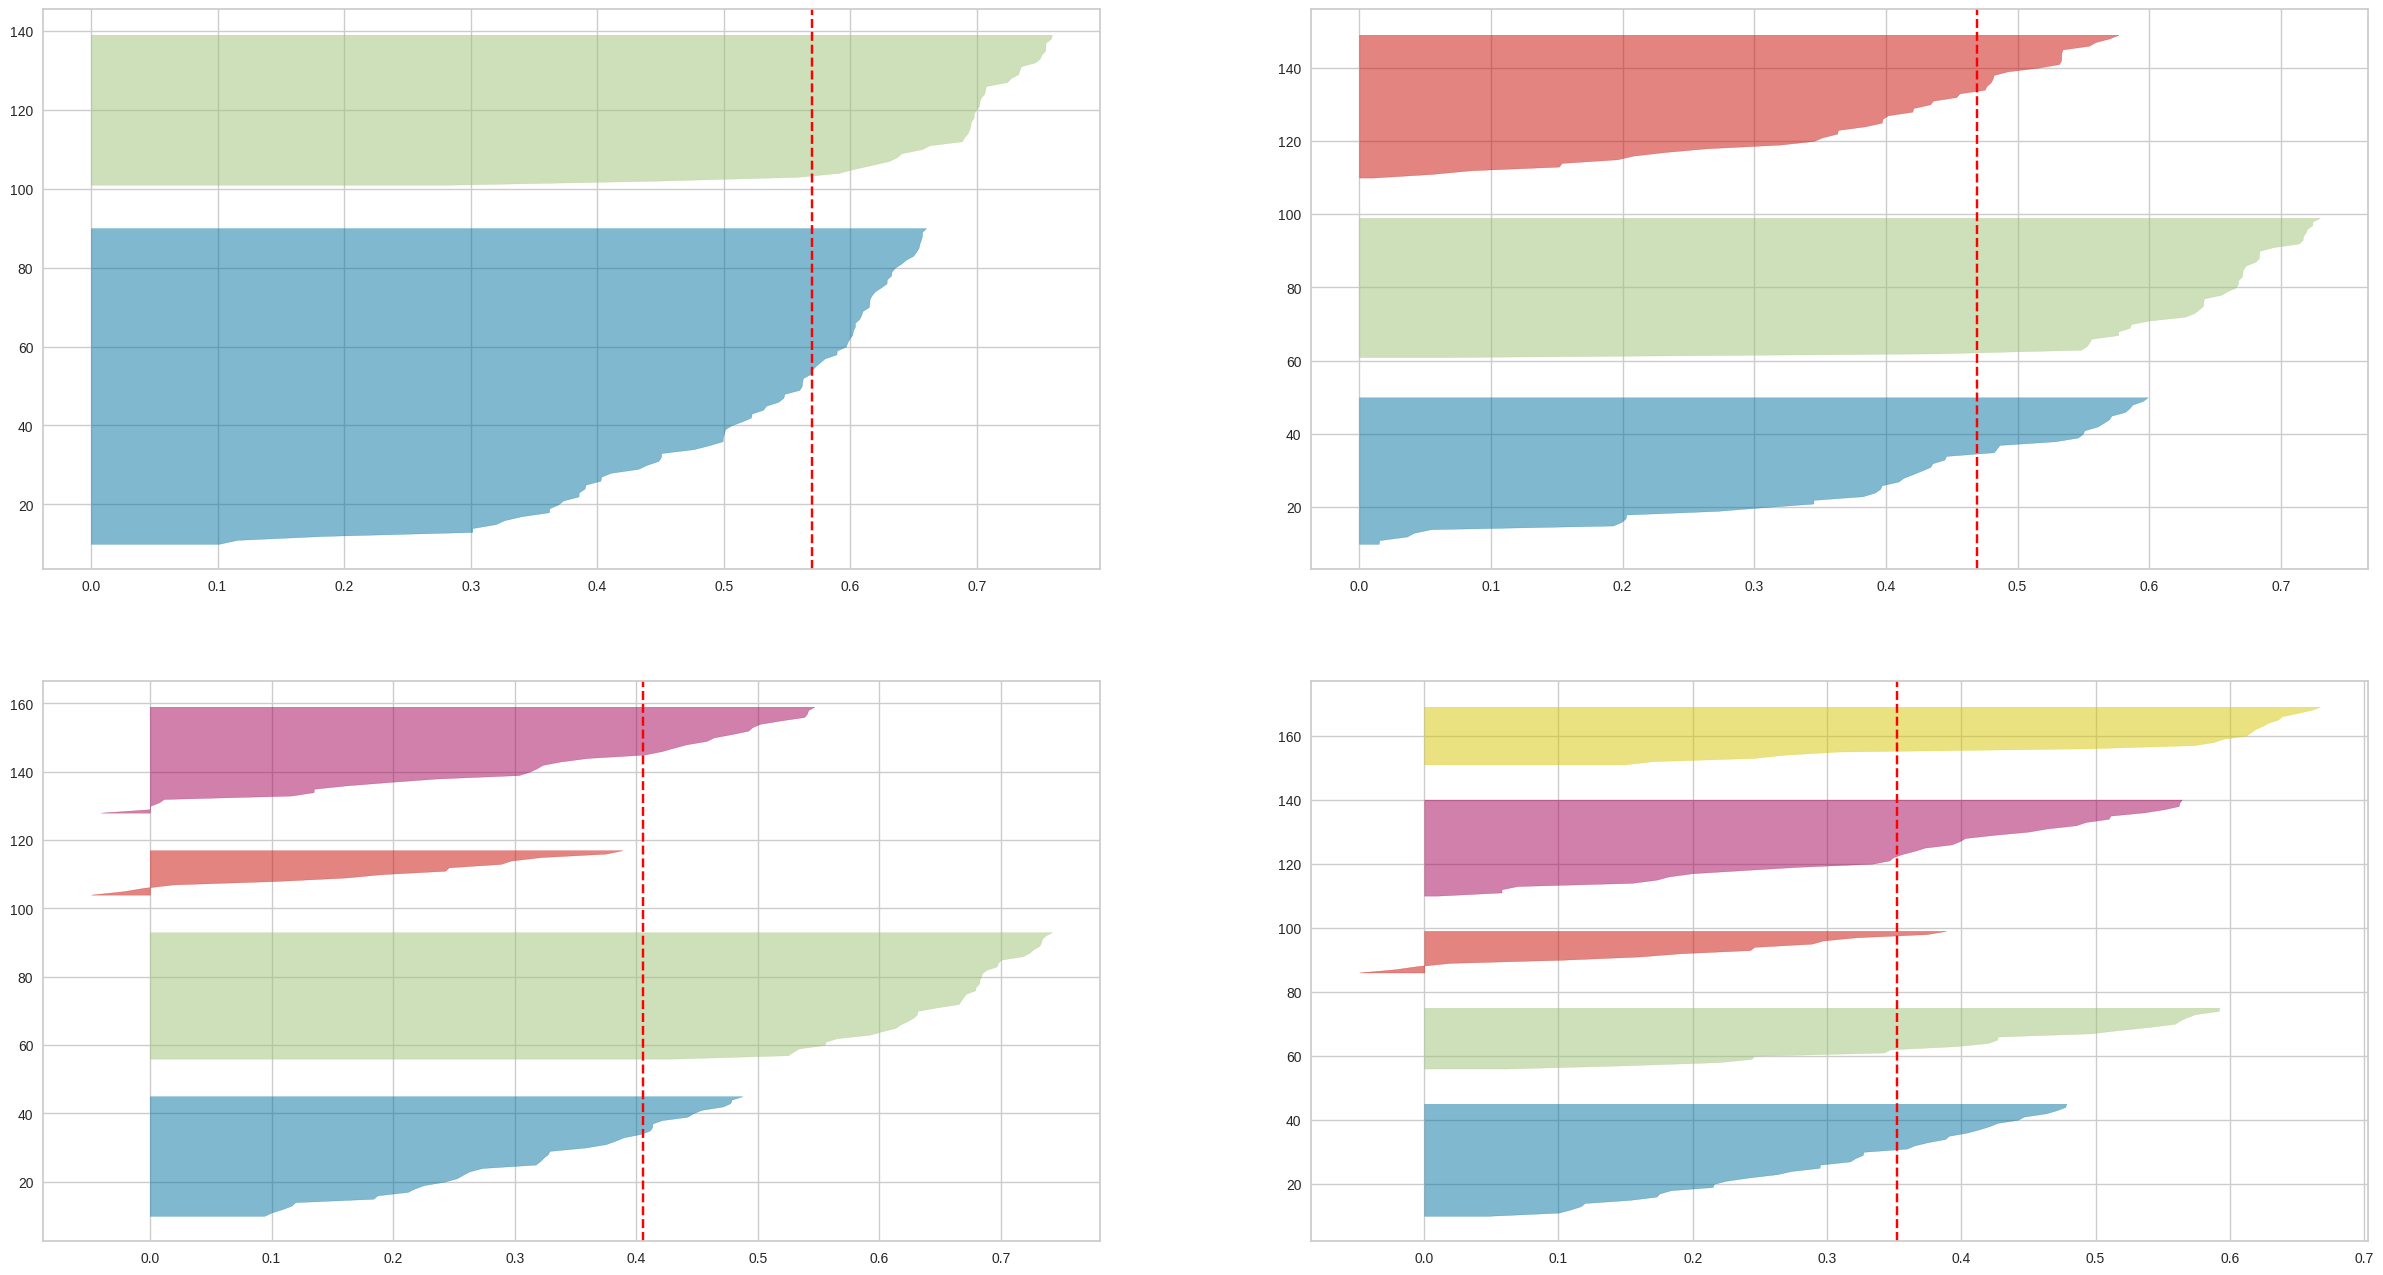

In [225]:
silhouette_scores, range_k = utils.visualize_silhouette(x_train, 5)

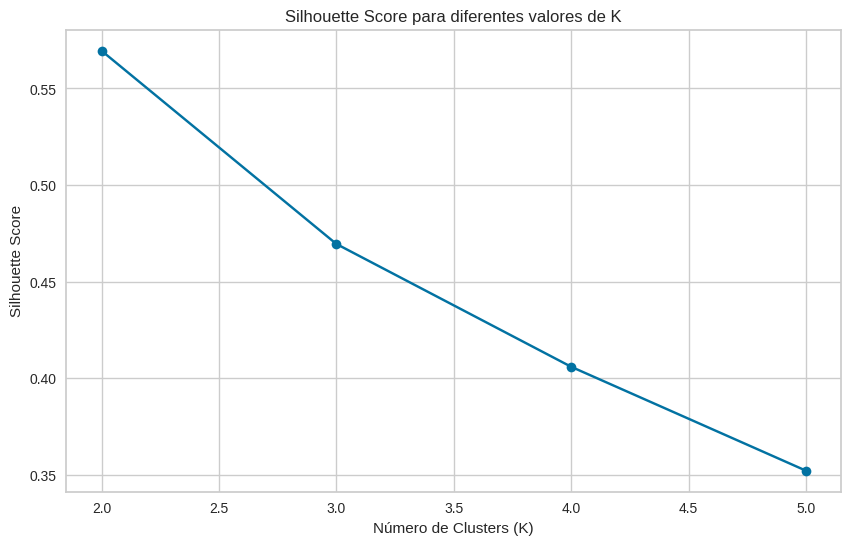

In [226]:
utils.visualize_sil_score_per_cluster(silhouette_scores, range_k)

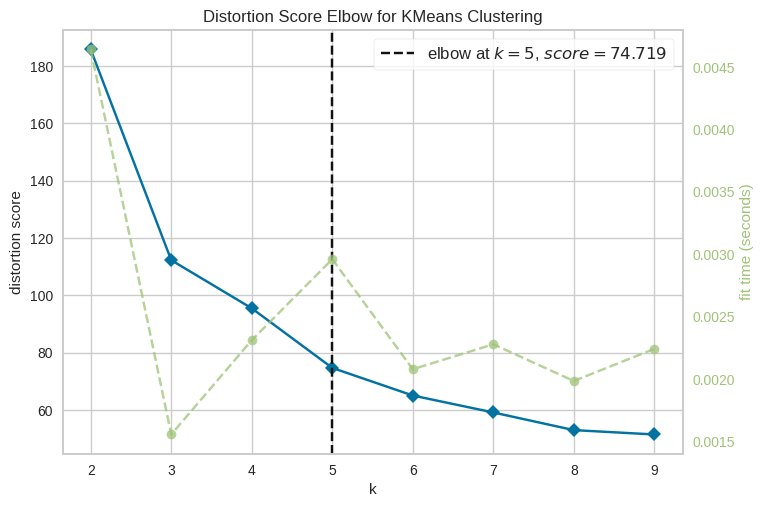

In [227]:
utils.visualize_elbow(x_train, 10)

# Criação de Features

In [228]:
n = 3

In [229]:
km = KMeans(n_clusters=n, random_state=0)
clusters = km.fit_predict(x_train)
centroids = km.cluster_centers_

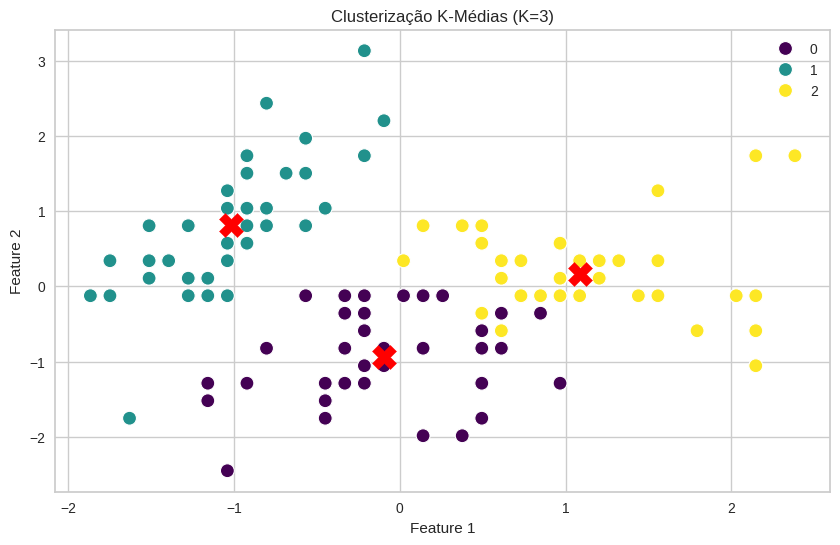

In [230]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=clusters, palette='viridis', s=100)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f"Clusterização K-Médias (K={n})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [231]:
x_train_mod, x_test_mod = utils.criar_features_dataset(x_train, x_test, centroids)

In [232]:
x_train_mod

,0,1,2,3,F0,F1,F2
0,0.613030,0.108501,0.947518,0.736072,1.496175,3.519533,0.549536
1,-0.567766,-0.124001,0.384914,0.347530,0.947263,2.580260,1.897734
2,-0.803926,1.038510,-1.302896,-1.336154,3.081229,0.315483,3.871303
3,0.258791,-0.124001,0.609956,0.736072,1.056831,3.212440,0.987127
4,0.613030,-0.589006,1.003778,1.254129,1.458149,4.058841,0.927448
...,...,...,...,...,...,...,...
115,-1.158164,0.108501,-1.302896,-1.465668,2.782224,0.740909,4.039730
116,0.494950,-0.356503,1.003778,0.736072,1.185539,3.625694,0.836117
117,-0.095448,-0.821508,0.159873,-0.300041,0.572944,2.585561,2.176386
118,2.148065,1.736017,1.622642,1.254129,3.861239,5.097772,2.018454


In [233]:
x_test_mod

,0,1,2,3,F0,F1,F2
0,-0.095448,-0.589006,0.722476,1.513157,1.381114,3.849514,1.513913
1,0.140712,-1.984019,0.103613,-0.300041,1.221570,3.487273,2.824272
2,-0.449687,2.666026,-1.359156,-1.336154,4.286603,1.939614,4.417873
3,1.675747,-0.356503,1.397601,0.736072,2.211969,4.482951,0.934775
4,-1.040085,0.806008,-1.302896,-1.336154,3.003460,0.062559,3.947799
5,0.494950,0.573506,1.228820,1.642671,2.329969,4.173572,0.995717
6,-1.040085,1.038510,-1.415416,-1.206640,3.141540,0.256906,3.983849
7,0.967269,0.108501,0.497435,0.347530,1.504476,3.225825,0.820602
8,1.085349,-0.589006,0.553695,0.218015,1.253832,3.486930,1.167634
9,0.258791,-0.589006,0.103613,0.088501,0.558760,2.740100,1.688005


# SVM

## Modelo de ML

In [234]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

### Dataset Original

In [235]:
svc_ori = SVC(probability=True)

In [236]:
grid_ori = GridSearchCV(estimator=svc_ori, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [237]:
grid_ori.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

### Dataset Modificado

In [238]:
svc_mod = SVC(probability=True)

In [239]:
grid_mod = GridSearchCV(estimator=svc_mod, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [240]:
grid_mod.fit(x_train_mod, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

## Avaliação dos Modelos

### Dataset Original

In [241]:
y_pred = utils.show_estimator_results(grid_ori, x_test, y_test)

Melhores parâmetros GridSearch: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Score GridSearch: 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



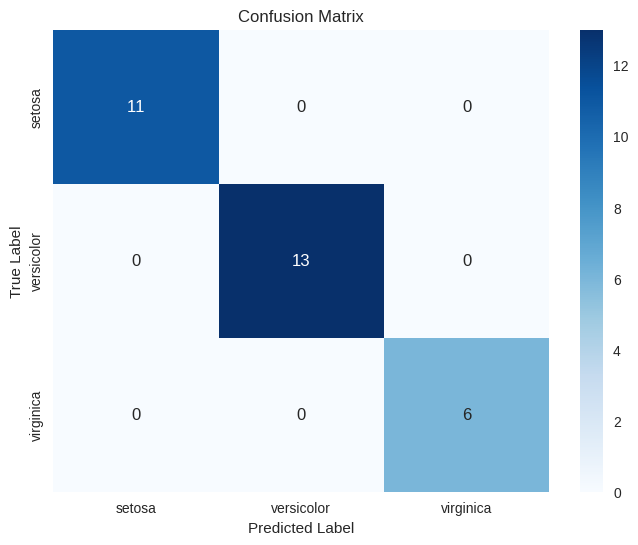

In [242]:
utils.show_cm(y_test, y_pred, labels)

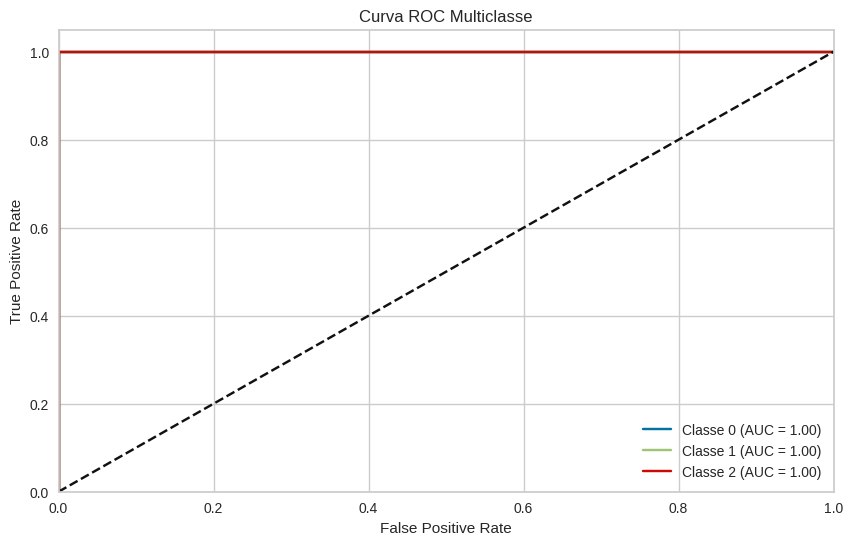

In [243]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = grid_ori.best_estimator_.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # número de classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()

### Dataset Modificado

In [244]:
y_pred = utils.show_estimator_results(grid_mod, x_test_mod, y_test)

Melhores parâmetros GridSearch: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Score GridSearch: 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



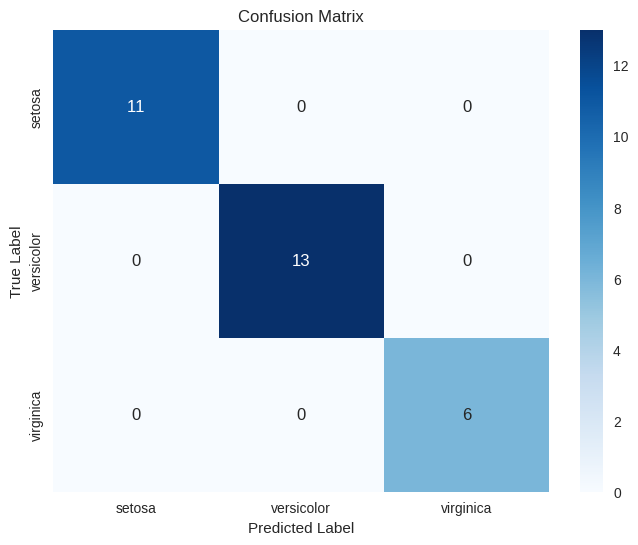

In [245]:
utils.show_cm(y_test, y_pred, labels)

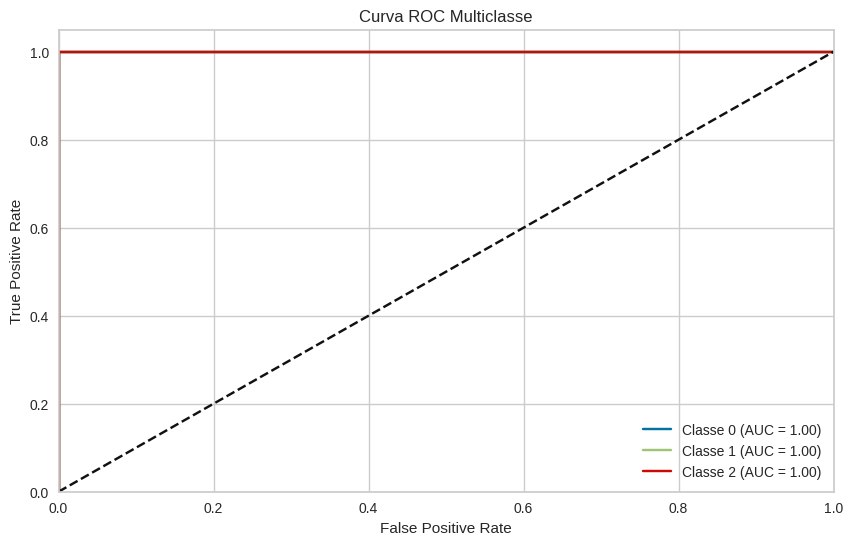

In [246]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = grid_mod.best_estimator_.predict_proba(x_test_mod)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # número de classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()

# Random Forest

## Modelo de ML

In [247]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
}

### Dataset Original

In [248]:
rf_ori = RandomForestClassifier()

In [249]:
grid_ori = GridSearchCV(estimator=rf_ori, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [250]:
grid_ori.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

### Dataset Modificado

In [251]:
rf_mod = RandomForestClassifier()

In [252]:
grid_mod = GridSearchCV(estimator=rf_mod, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [253]:
grid_mod.fit(x_train_mod, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

## Avaliação dos Modelos

### Dataset Original

In [254]:
y_pred = utils.show_estimator_results(grid_ori, x_test, y_test)

Melhores parâmetros GridSearch: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
Score GridSearch: 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



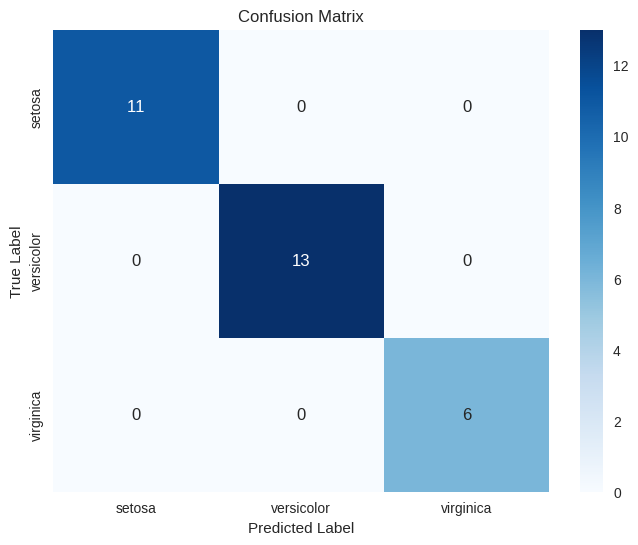

In [255]:
utils.show_cm(y_test, y_pred, labels)

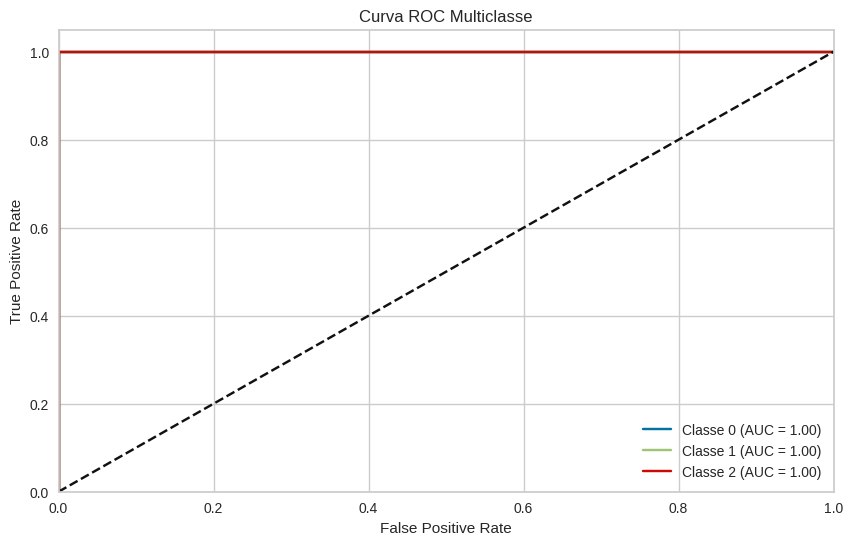

In [256]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = grid_ori.best_estimator_.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # número de classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()

### Dataset Modificado

In [257]:
y_pred = utils.show_estimator_results(grid_mod, x_test_mod, y_test)

Melhores parâmetros GridSearch: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 10}
Score GridSearch: 0.9666666666666667

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



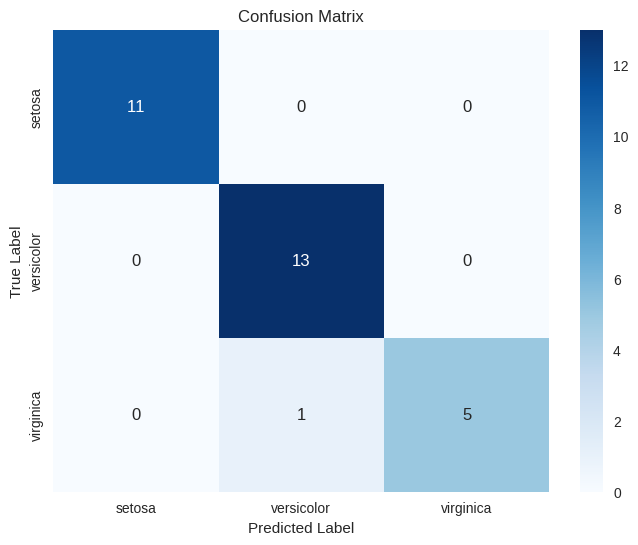

In [258]:
utils.show_cm(y_test, y_pred, labels)

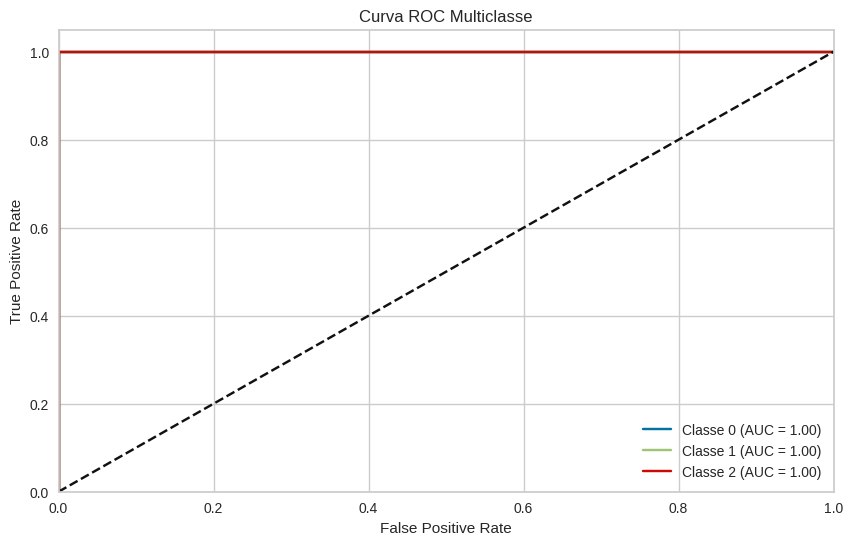

In [259]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = grid_mod.best_estimator_.predict_proba(x_test_mod)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # número de classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()